In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.preprocessing import LabelEncoder


In [8]:
sns.set()

In [9]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

df['age'].value_counts().sort_values()

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
clean_data={'sex': {'male':0,'female':1} ,'smoker': {'no':0,'yes':1},'region': {'northwest':0,'northeast':1,'southeast':2,'southwest':3}}
data_copy=df.copy()
data_copy.replace(clean_data, inplace=True)

Converting catagorical data to numerical

In [17]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


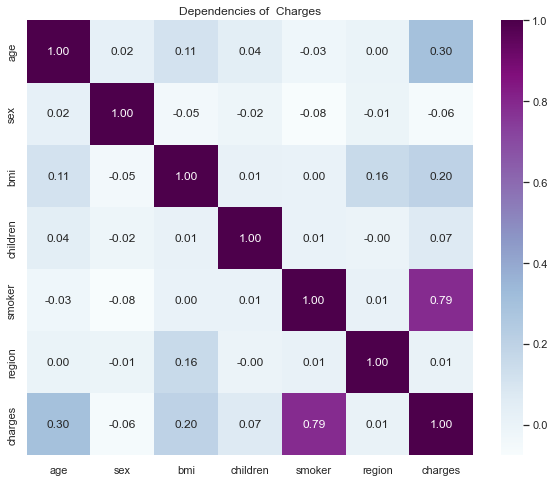

In [18]:
corr=data_copy.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of  Charges")
plt.show()

Smoker,age and bmi have greater correlation with charges, hence we can drop the other 3 columns sex,children and region.

In [19]:
print(data_copy['sex'].value_counts().sort_values())
print(data_copy['smoker'].value_counts().sort_values())
print(data_copy['region'].value_counts().sort_values())

1    662
0    676
Name: sex, dtype: int64
1     274
0    1064
Name: smoker, dtype: int64
1    324
3    325
0    325
2    364
Name: region, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

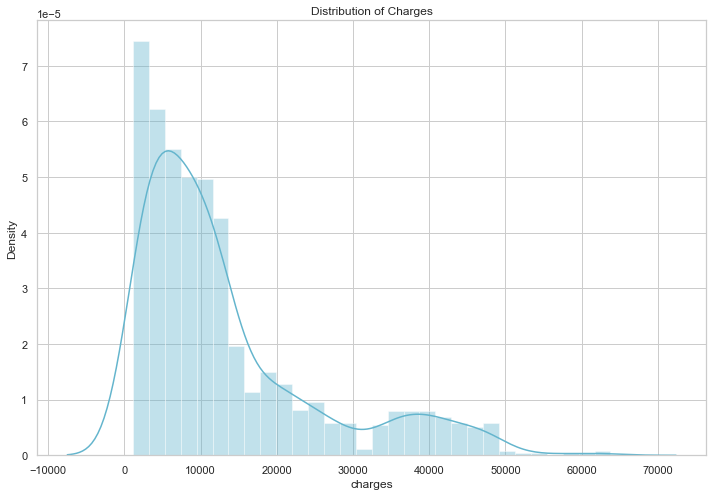

In [20]:
sns.set(style='whitegrid')
f, ax=plt.subplots(1,1, figsize=(12,8))
ax=sns.distplot(df['charges'], kde=True, color='c')
plt.title('Distribution of Charges')

The data is right/positively skewed.We can log transform it to make normal/symmetry.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


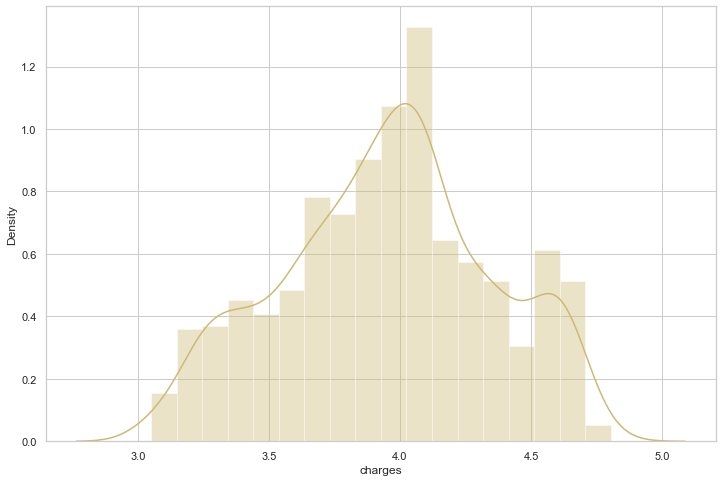

In [21]:
f, ax=plt.subplots(1,1, figsize=(12,8))
ax=sns.distplot(np.log10(df['charges']), kde=True, color='y')

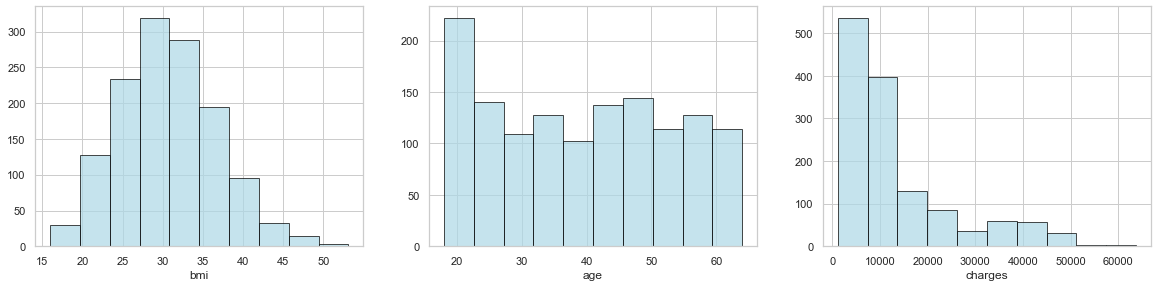

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('charges')
plt.show()

bmi and age are quite uniformally distributed
Charges are highly skewed

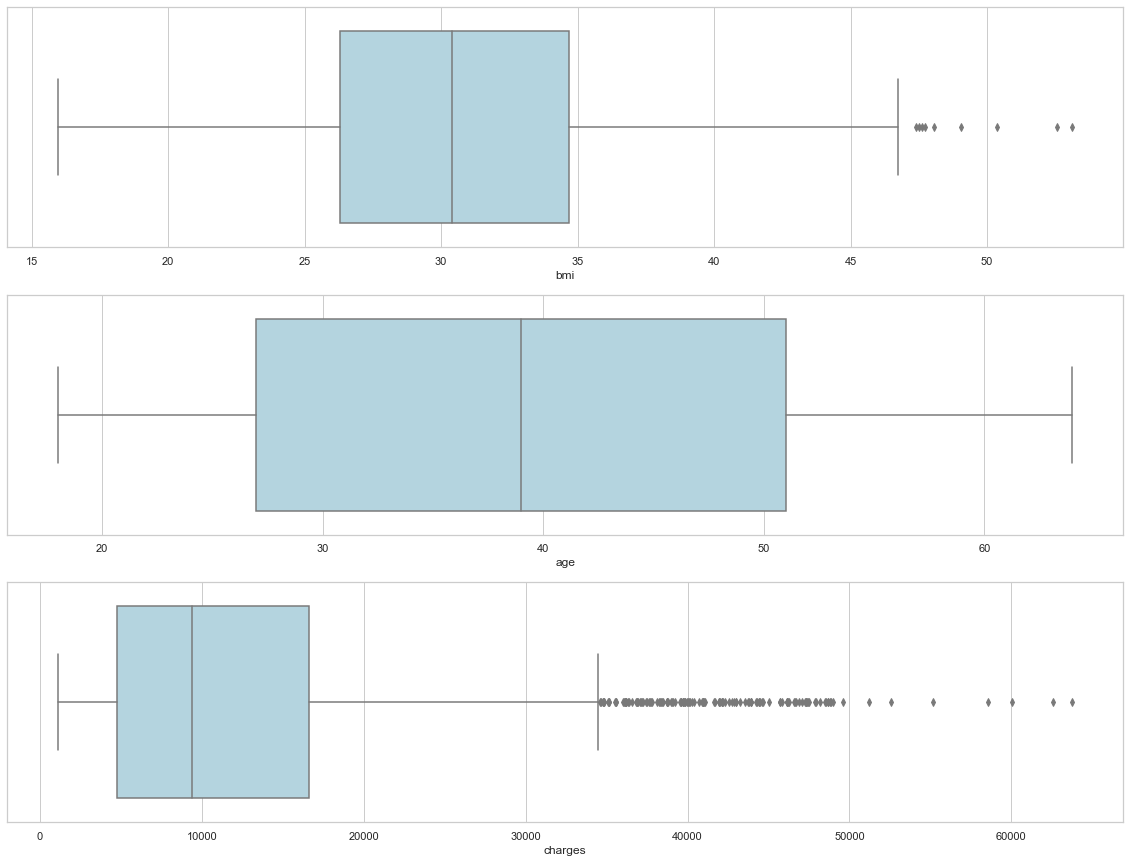

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x=df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x=df.charges, color='lightblue')
plt.show()

BMI has few extreme values,charges ofcs has lot of extreme values

In [25]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0}: Skewness{1:.3f}and  Kurtosis{2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age: Skewness0.056and  Kurtosis-1.245
sex: Skewness0.021and  Kurtosis-2.003
bmi: Skewness0.284and  Kurtosis-0.051
children: Skewness0.938and  Kurtosis0.202
smoker: Skewness1.465and  Kurtosis0.146
region: Skewness-0.038and  Kurtosis-1.329
charges: Skewness1.516and  Kurtosis1.606


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


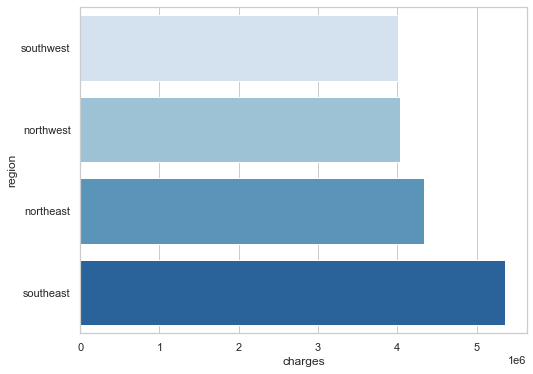

In [26]:
charges=df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax=plt.subplots(1,1, figsize=(8,6))
ax=sns.barplot(charges.head(), charges.head().index, palette='Blues')

Highest medical charges in southeast region

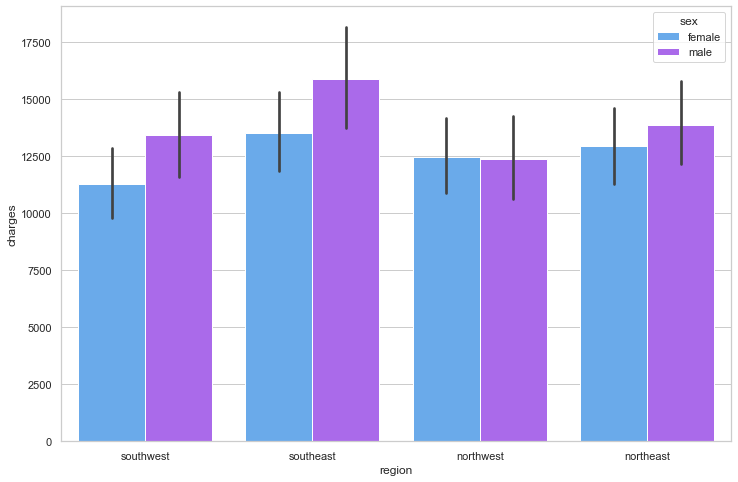

In [27]:
f, ax=plt.subplots(1,1, figsize=(12,8))
ax=sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

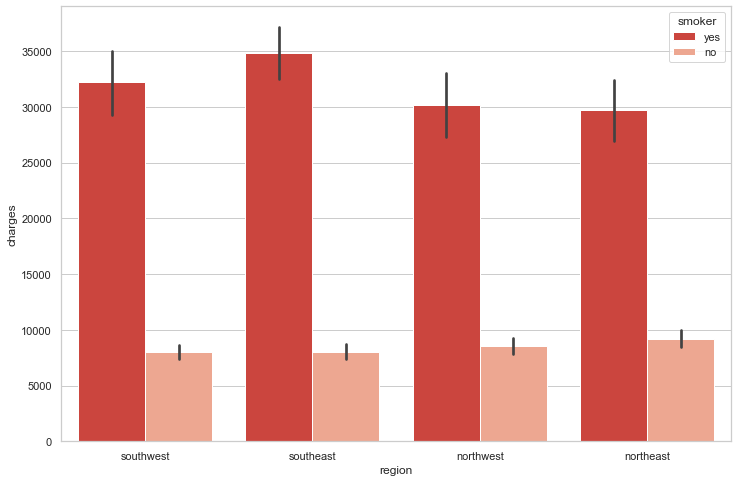

In [28]:
f, ax=plt.subplots(1,1, figsize=(12,8))
ax=sns.barplot(x='region', y='charges',hue='smoker', data=df, palette='Reds_r')

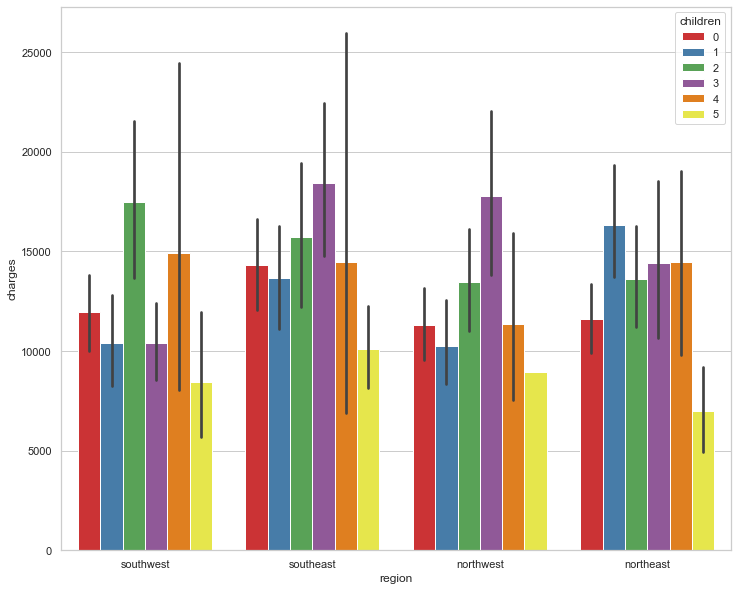

In [30]:
f, ax=plt.subplots(1,1, figsize=(12,10))
ax=sns.barplot(x='region', y='charges', hue='children', data=df,palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in theNortheast, but people in the Northeast have higher charges by gender than in the Southwest andNorthwest overall. And people with children tend to have higher medical costs overall as well

Text(0.5, 1.0, 'Age vs Charges')

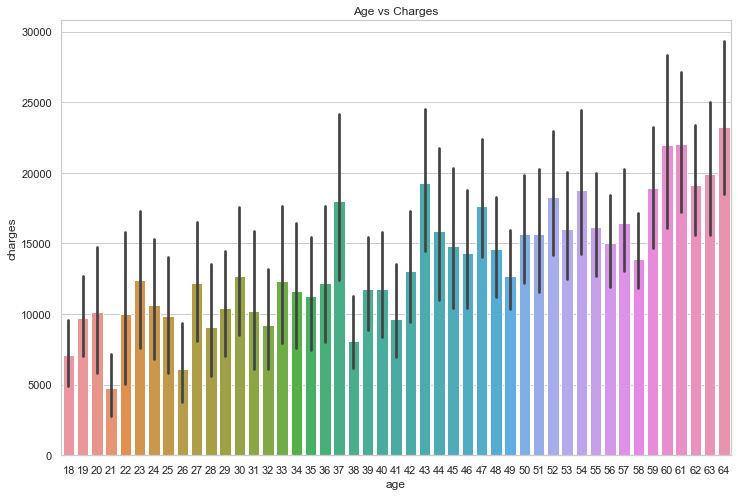

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='charges', data=df)
plt.title("Age vs Charges")

Insurance charges higher with age

Text(0.5, 1.0, 'sex vs charges')

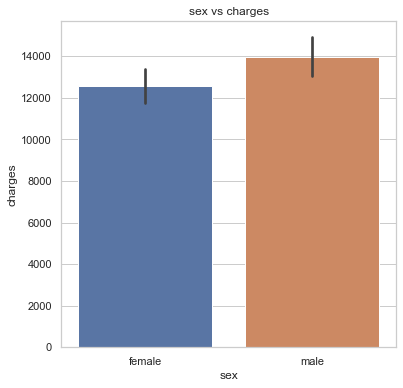

In [32]:
plt.figure(figsize=(6,6))
sns.barplot(x='sex', y='charges', data=df)
plt.title('sex vs charges')

Men have greater insurance charges than females

Text(0.5, 1.0, 'smoker vs charges')

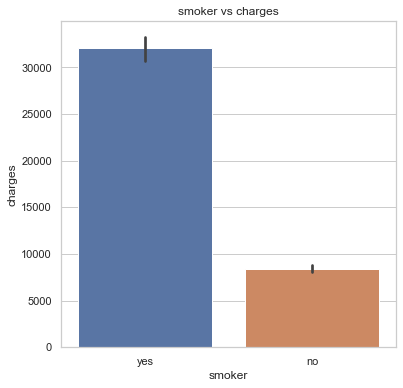

In [33]:
plt.figure(figsize=(6,6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('smoker vs charges')

Smokers have higher insurance charges

Text(0.5, 1.0, 'BMI VS Charge')

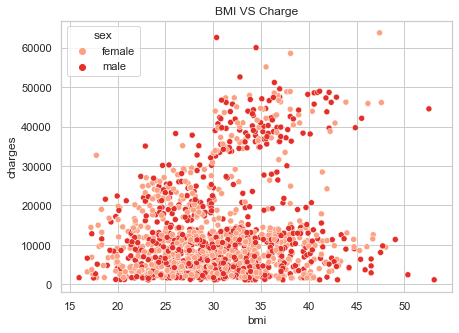

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

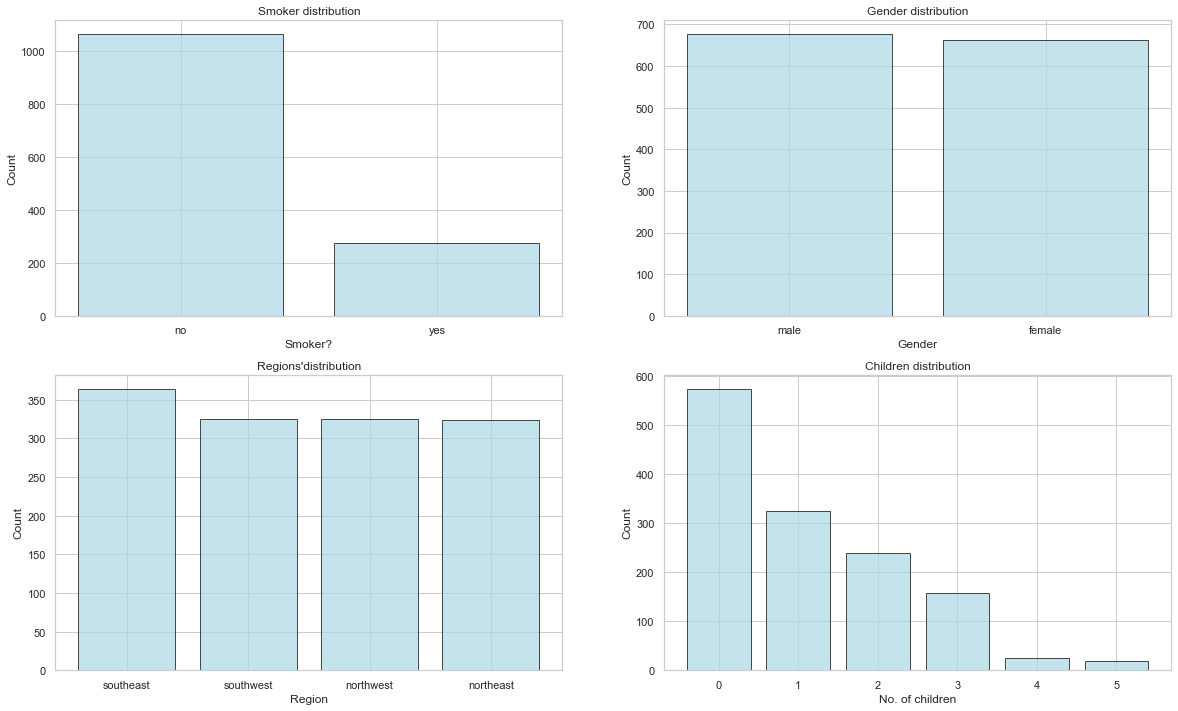

In [37]:
plt.figure(figsize=(20,25))

x=df.smoker.value_counts().index
y=[df['smoker'].value_counts()[i]for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1=df.sex.value_counts().index
y1=[df['sex'].value_counts()[j]for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2=df.region.value_counts().index
y2=[df['region'].value_counts()[k]for k in x2]


plt.subplot(4,2,3) 
plt.bar(x2,y2, align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Regions'distribution")

x3=df.children.value_counts().index
y3=[df['children'].value_counts()[l]for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.title("Children distribution")
plt.show()








There are a lot more non-smokers than there are smokers in the data
Instances are distributed evenly across all regions 
Gender also distributed evenly
Most instances have less than 2 children and very few have 4 and 5

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

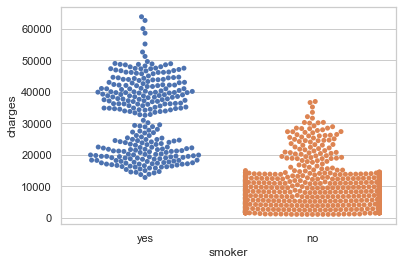

In [48]:
sns.swarmplot(x=df['smoker'],y=df['charges'])

# Result:

The only obvious correlation of ‘charges’ is with ‘smoker’Looks like smokers claimed more money than non-smokers 
There’s an interesting pattern between ‘age’ and ’charges. 
Could be because for the same ailment, older people are charged more than the younger ones
on average, non-smokers are charged less than smokers and the customers who pay the most are smokers whereas the customers who pay theleast are non-smokers. Therefore, our conclusion would be that keeping everything  else constant, bank must charge more premium to smokers than to non-smokers.
Moreover, older people must be charged more premium than those who are young